In [15]:
import os
import json
import ijson
import pandas as pd

In [40]:

with open('AQAD-master/AQQAD 1.0/FINAL_AAQAD-v1.0.json','rb') as f:
  data = json.load(f)

for allData in data['data']:
    print(allData['title']+"\n")
    print(allData['paragraphs'])
    
    
    break

بيونسيه

[{'qas': [{'question': 'متى بدأت بيونسي تصبح شعبية؟', 'id': 1, 'answers': [{'text': 'في أواخر التسعينات', 'answer_start': 220}], 'is_impossible': False}, {'question': 'ما هي المجالات التي تنافس عليها بيونسيه عندما كانت تكبر؟', 'id': 2, 'answers': [{'text': 'غناء ورقص', 'answer_start': 173}], 'is_impossible': False}, {'question': 'متى غادرت بيونسي طفل القدر وتصبح مغنية منفردة؟', 'id': 3, 'answers': [{'text': '(2003)،', 'answer_start': 515}], 'is_impossible': False}, {'question': 'في أي مدينة و ولاية نشأت بيونسيه؟', 'id': 4, 'answers': [{'text': 'هيوستن بولاية تكساس،', 'answer_start': 88}], 'is_impossible': False}, {'question': 'في أي عقد أصبحت بيونسي مشهورة؟', 'id': 5, 'answers': [{'text': 'أواخر التسعينات', 'answer_start': 223}], 'is_impossible': False}, {'question': 'في أي مجموعة R&B كانت هي المغنية الرئيسية؟', 'id': 6, 'answers': [{'text': 'دستنيز تشايلد', 'answer_start': 290}], 'is_impossible': False}, {'question': 'ما الألبوم الذي جعلها فنانة معروفة عالميا؟', 'id': 7, 'ans

In [24]:
rows = []
questions = []
contexts = []
for entry in data['data']:
    title = entry['title']
    for paragraph in entry['paragraphs']:
        context = paragraph['context']
        contexts.append(context)
        for qa in paragraph['qas']:
            question = qa['question']
            questions.append(question)
            answer = qa['answers']
            is_impossible = qa['is_impossible']
            rows.append((title, question, answer, is_impossible))
df = pd.DataFrame(rows, columns=['title', 'question', 'answer', 'is_impossible'])
df.head()

,title,question,answer,is_impossible
0,بيونسيه,متى بدأت بيونسي تصبح شعبية؟,"[{'text': 'في أواخر التسعينات', 'answer_start'...",False
1,بيونسيه,ما هي المجالات التي تنافس عليها بيونسيه عندما ...,"[{'text': 'غناء ورقص', 'answer_start': 173}]",False
2,بيونسيه,متى غادرت بيونسي طفل القدر وتصبح مغنية منفردة؟,"[{'text': '(2003)،', 'answer_start': 515}]",False
3,بيونسيه,في أي مدينة و ولاية نشأت بيونسيه؟,"[{'text': 'هيوستن بولاية تكساس،', 'answer_star...",False
4,بيونسيه,في أي عقد أصبحت بيونسي مشهورة؟,"[{'text': 'أواخر التسعينات', 'answer_start': 2...",False


In [5]:
from transformers import pipeline
model = pipeline('text-classification', model='Ammar-alhaj-ali/arabic-MARBERT-news-article-classification')
sentences = ['أخطرت شركة أرامكو السعودية 4 على الأقل من المشترين في شمال آسيا بأنها ستورد إليهم الكميات المتعاقد عليها من النفط الخام كاملة في سبتمبرأيلول المقبل. وقالت مصادر مطلعة لرويترز إن السعودية، أكبر مصدر النفط في العالم، كانت قد رفعت سعر البيع الرسمي للمشترين الآسيويين إلى مستويات قياسية لذلك الشهر.']
model(sentences)

[{'label': 'Finance', 'score': 0.9998553991317749}]

In [31]:
questions

['متى بدأت بيونسي تصبح شعبية؟',
 'ما هي المجالات التي تنافس عليها بيونسيه عندما كانت تكبر؟',
 'متى غادرت بيونسي طفل القدر وتصبح مغنية منفردة؟',
 'في أي مدينة و ولاية نشأت بيونسيه؟',
 'في أي عقد أصبحت بيونسي مشهورة؟',
 'في أي مجموعة R&B كانت هي المغنية الرئيسية؟',
 'ما الألبوم الذي جعلها فنانة معروفة عالميا؟',
 'من أدار مجموعة مصير الطفل؟',
 'متى صعدت بيونسي إلى الشهرة؟',
 'ما الدور الذي لعبه بيونسيه في طفل القدر؟',
 'ما هو أول ألبوم صدر بيونسيه كفنان منفرد؟',
 'متى أطلقت بيونسيه خطير في الحب؟',
 'كم عدد جوائز Grammy التي فازت بها Beyoncé لأول ألبوم منفرد لها؟',
 'ماذا كان دور بيونسيه في طفل القدر؟',
 'ما هو اسم أول ألبوم منفرد لبيونسي؟',
 'في أي مدينة ذهبت بيونسي إلى المدرسة؟',
 'من كان أول شخص يلاحظ قدرة بيونسي على الغناء؟',
 'انتقلت بيونسي إلى أي مدينة بعد أن تركت مدرستها الابتدائية الأولى؟',
 'أي من أساتذتها اكتشفوا موهبة بيونسي الموسيقية؟',
 'أنا الكنيسة التي كانت بيونسيه عضو وعازف منفرد في الجوقة؟',
 'ما نوع المدرسة التي كانت مدرسة باركر الابتدائية؟',
 'ما الأغنية التي غنتها بيونس

In [35]:
questions[len(questions)-1]

'ما الفاصوليا المستخدمة لصنع الفلافل؟'

In [30]:
len(questions)

17911

In [37]:
contexts[0]

'بيونسي جيزيل نولز-كارتر (من مواليد 4 سبتمبر، 1981)، المعروفة باسم بيونسي. ولدت ونشأت في هيوستن بولاية تكساس، هي مغنية وممثلة أميركية حائزة على 23 جائزة غرامي.غنت في مسابقات غناء ورقص مختلفة عندما كانت طفلة، أصبحت مشهورة في أواخر التسعينات كمغنية آر أند بي (رئيسية) للفرقة الغنائية النسائية دستنيز تشايلد. والتي أديرت من قِبل والدها ماثيو نولز، وأصبحت الفرقة واحدة من الأكثر مبيعاً في العالم من الفرق النسائية على الإطلاق. وقد شهد إنفصال الفرقة المؤقت صدور ألبوم بيونسي الأول  Dangerously in Love دانجيروسلي إن لوف  (2003)، والذي أنشأها بأن تكون فنان منفرد ناجح في العالم؛ بيعت منه 16 مليون نسخة، حصل على خمسة جوائز غرامي وتضمن الأغاني التي وصلت إلى قمة الرسم البياني الأمريكي بيلبورد هوت 100 "كريزي إن لوف" و"بيبي بوي". \n'

In [28]:
type(contexts)

list

In [29]:
len(contexts)

3381

In [33]:
question_based = model(questions)
question_based

[{'label': 'Politics', 'score': 0.9937604069709778},
 {'label': 'Religion', 'score': 0.999920129776001},
 {'label': 'Sports', 'score': 0.7779321670532227},
 {'label': 'Religion', 'score': 0.40711548924446106},
 {'label': 'Sports', 'score': 0.9647139310836792},
 {'label': 'Culture', 'score': 0.9985942244529724},
 {'label': 'Culture', 'score': 0.9996044039726257},
 {'label': 'Culture', 'score': 0.9774686694145203},
 {'label': 'Sports', 'score': 0.9934495091438293},
 {'label': 'Culture', 'score': 0.9956499934196472},
 {'label': 'Culture', 'score': 0.9964367151260376},
 {'label': 'Sports', 'score': 0.9932299852371216},
 {'label': 'Sports', 'score': 0.6905885338783264},
 {'label': 'Culture', 'score': 0.9719630479812622},
 {'label': 'Sports', 'score': 0.7302801609039307},
 {'label': 'Sports', 'score': 0.8120607733726501},
 {'label': 'Sports', 'score': 0.5374330282211304},
 {'label': 'Sports', 'score': 0.9933940768241882},
 {'label': 'Culture', 'score': 0.9998278617858887},
 {'label': 'Politi

In [44]:
list(df['title'])

['بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'بيونسيه',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي بود',
 'آي

In [68]:
from collections import Counter

def count_frequencies(lst):
    frequency_counter = Counter(lst)
    sorted_frequencies = frequency_counter.most_common()
    return sorted_frequencies

frequencies = count_frequencies(list(df['title']))
frequencies

[('يونانيون', 345),
 ('العصور الوسطى', 288),
 ('أكسجين', 285),
 ('جمال عبد الناصر', 270),
 ('الإمبراطورية البريطانية', 250),
 ('ناميبيا', 247),
 ('نادي أرسنال', 234),
 ('ألاسكا', 225),
 ('سل', 221),
 ('أصل الأنواع', 215),
 ('جيولوجيا', 213),
 ('تبديل الرزم', 209),
 ('ألكسندر غراهام بيل', 203),
 ('نابليون بونابرت', 201),
 ('البرتغال', 197),
 ('إليزابيث الثانية', 193),
 ('افتراس', 190),
 ('عصور حديثة', 190),
 ('ابن سينا', 184),
 ('جهاز مناعي', 183),
 ('كرة القدم', 181),
 ('زنك', 178),
 ('الدولة الأموية', 177),
 ('بكتيريا', 177),
 ('ولايات ألمانيا', 166),
 ('طاجيكستان', 166),
 ('مبيد آفات', 164),
 ('إستونيا', 164),
 ('شعور', 161),
 ('ليبيريا', 159),
 ('طاقة', 158),
 ('ربو', 157),
 ('جين', 155),
 ('معمر القذافي', 155),
 ('بلاي ستيشن 3', 152),
 ('توقيت صيفي', 147),
 ('مادونا (مغنية)', 144),
 ('سويسرا', 144),
 ('حشرة', 140),
 ('ساموا', 139),
 ('صندوق الأمم المتحدة للسكان', 138),
 ('زمن', 138),
 ('القرآن', 138),
 ('بروتستانتية', 137),
 ('أمن الحاسوب', 135),
 ('ريتشارد فاينمان', 135),
 ('زمرة 

In [69]:
toplot = dict(frequencies)

In [74]:
import matplotlib.pyplot as plt

# plt.bar(range(len(toplot)), list(toplot.values()), align='center')
# plt.xticks(range(len(toplot)), list(toplot.keys()))
df_p = pd.DataFrame(toplot.items())
df_p.columns = ['Title','Count']
df_p

,Title,Count
0,يونانيون,345
1,العصور الوسطى,288
2,أكسجين,285
3,جمال عبد الناصر,270
4,الإمبراطورية البريطانية,250
...,...,...
292,جون فون نيومان,3
293,فريدريش فون هايك,3
294,حيدر آباد,3
295,ذا برونكس,3


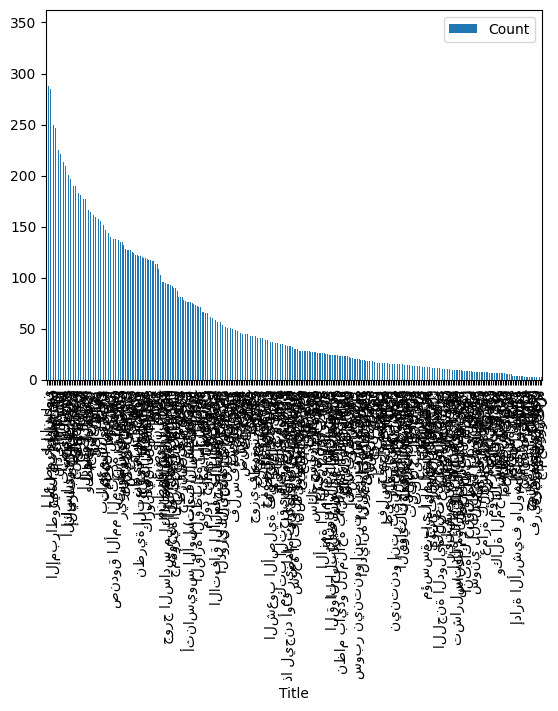

In [75]:
df_p.plot(kind='bar',x="Title",y="Count") 
plt.show()

In [45]:
list_based = model(list(df['title']))
list_based

[{'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0.8410123586654663},
 {'label': 'Sports', 'score': 0

In [36]:
context_based = model(contexts)
context_based

RuntimeError: The size of tensor a (517) must match the size of tensor b (512) at non-singleton dimension 1